<a href="https://colab.research.google.com/github/printf-bomotayo/Titanic_Survival_prediction_model/blob/main/Titanic_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
import os

Mounted at /content/gdrive


In [2]:
os.chdir("/content/gdrive/My Drive")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Phase

Importing dataset

In [5]:
titanic = pd.read_excel('train.xlsx')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Finding the number os missing values on each column.

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Replacing Missing Numerical Values with the appropriate values
Replacing Missing Numerical Values of the "Age" Feature

In [9]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

Number of Elements per Category of the "Cabin" Feature as a Categorical value

In [23]:
titanic['Cabin'].fillna('G6', inplace = True)

Number of Elements per Category of the "Embarked" Feature

In [19]:
print(titanic['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Replacing Missing Categorical Values of the "Embarked" Feature

In [21]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

Verifying the Data

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [30]:
titanic = titanic.drop('Cabin', axis=1)

In [31]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Visualization Phase

Distribution of the most important features

"Age" Distribution

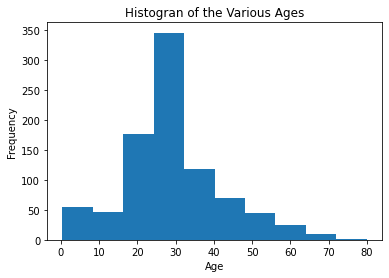

In [33]:
plt.title('Histogran of the Various Ages')
plt.xlabel('Age')
titanic['Age'].plot.hist()

"Sex" Distribution

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

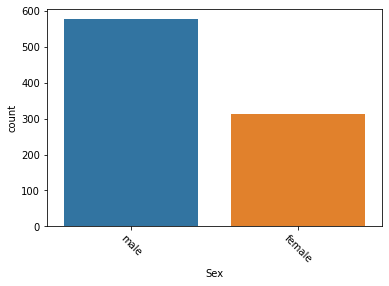

In [34]:
sns.countplot(x= "Sex", data= titanic)
plt.xticks(rotation=-45)

"Pclass" Distribution

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

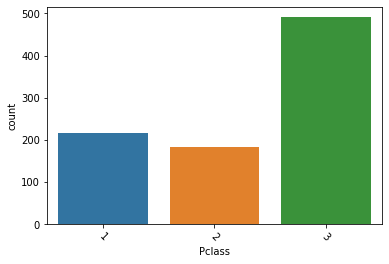

In [35]:
sns.countplot(x= "Pclass", data= titanic)
plt.xticks(rotation=-45)

"Embarked" Distribution

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

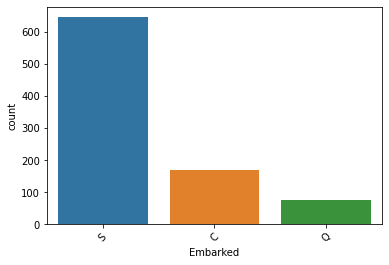

In [36]:
sns.countplot(x= "Embarked",data= titanic)
plt.xticks(rotation= 45)

The majority of passengers embarked at S (Southampton).


# Correlation between 'Sex' and 'Age'

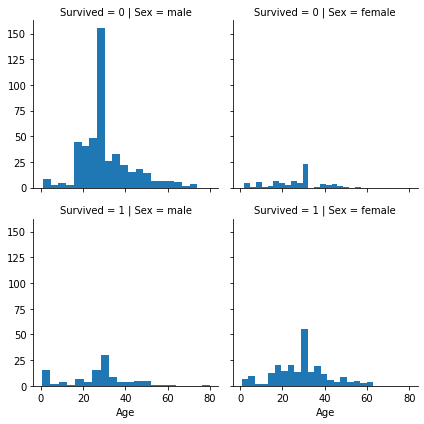

In [38]:
g = sns.FacetGrid(titanic, row='Survived', col='Sex')
g.map(plt.hist, 'Age', bins=20)

# Correlation btw 'Pclass' and 'Embarked'

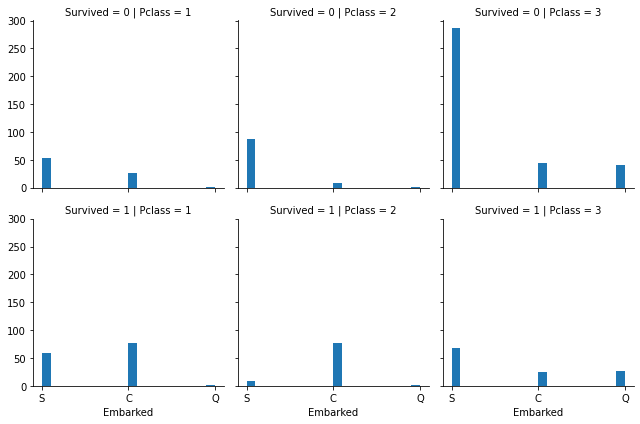

In [39]:
grid = sns.FacetGrid(titanic, row='Survived', col='Pclass')
grid.map(plt.hist, "Embarked", bins=20)

# Correlation Heatmap

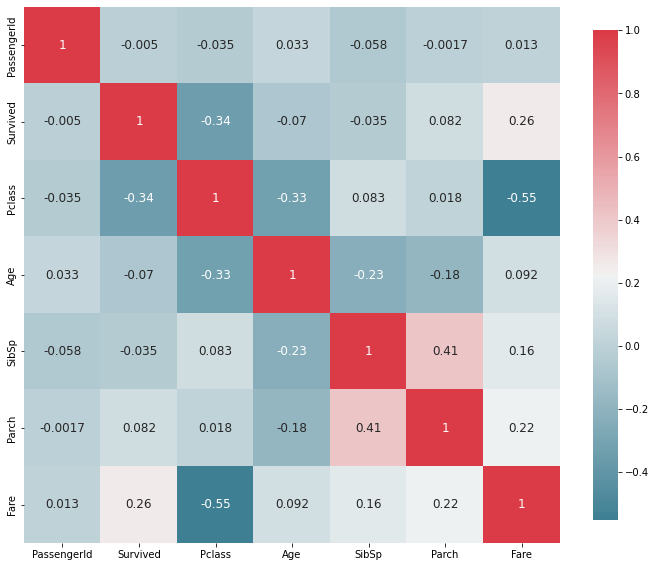

In [40]:
def plot_correlation_map( titanic ):

    corr = titanic.corr()

    s, ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(titanic)

Firstly, the number of male passengers we extracted from the "Sex" feature distribution is much higher than the number of female passengers. From the correlation between "Age" and "Sex" features above, we can deduce that females are more likely to survive than males. Also, according to the "Age" feature distribution, most passengers are in 15-35 years range. However, a large number of passengers that are between 15 and 25 years old did not survive the incident. We then visualized the correlation between "Pclass" and "Embarked" features which supplied us with the information that the 3rd class passengers are more likely to be dead than other classes and 1st class passengers are more likely to survive than other classes. In addition, passengers who embarked at C had a higher survival rate than people who embarked at S or Q. Last but not least, the function we defined was used to build a correlation heatmap which is, in fact, a graphical representation of correlation matrix representing correlation between all the different features of our dataset. The value of correlation can take any values between -1 and 1. Values closer to zero means there is no linear relationship between the two variables. The closer to 1 the correlation is, the more positively correlated the variables are. The closer to -1 the correlation is, the more negatively correlated the variables are. For example, the correlation between SibSp and Parch variables is equal to 0.41. They are somehow considered to have a moderate positive relationship which means that parents and siblings like to travel together. Also, the correlation between Pclass and Fare variables is equal to -0.55. They have a strong negative correlation which means that higher economic classes ("Pclasses") pay more for their trip ("Fare").

In [69]:
new_titanic= titanic.copy()
new_titanic= new_titanic.drop(["PassengerId", "Name", "Ticket"], axis=1)
new_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,male,1.0,1,0,7.2500,S
1,1,1,female,0.0,1,0,71.2833,C
2,1,1,female,0.0,0,0,7.9250,S
3,1,1,female,0.0,1,0,53.1000,S
4,0,1,male,0.0,0,0,8.0500,S


In [72]:
new_titanic['FamilySize'] = new_titanic['Parch'] + new_titanic['SibSp']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [73]:
new_titanic= new_titanic.drop("SibSp", axis= 1)
new_titanic= new_titanic.drop("Parch", axis= 1)

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_titanic["Embarked"]=encoder.fit_transform(new_titanic["Embarked"])
new_titanic['Sex'] = encoder.fit_transform(new_titanic['Sex'])

In [92]:
new_titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,1,1,1.000000,7.2500,S,1
1,1,1,0,0.000000,71.2833,C,1
2,1,1,0,0.000000,7.9250,S,0
3,1,1,0,0.000000,53.1000,S,1
4,0,1,1,0.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,1,1,0.000000,0.0000,S,0
887,1,1,0,1.000000,0.0000,S,0
888,0,1,0,29.699118,23.4500,S,2
889,1,1,1,0.000000,0.0000,C,0


In [75]:
new_titanic[["Survived", "FamilySize"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
0,0.301852
1,0.506276
2,0.517857


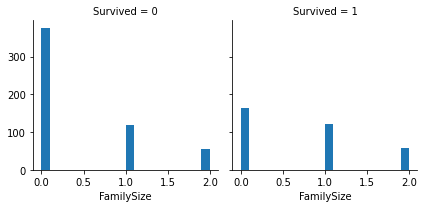

In [77]:
g = sns.FacetGrid(new_titanic, col='Survived')
g.map(plt.hist, 'FamilySize', bins = 20)

# Applying Logistic Regression

Features Extraction

In [102]:
X = new_titanic[["Pclass", "Age", "Sex", "FamilySize", "Embarked"]]
y = new_titanic["Survived"]

Split Dataset into Train and test split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Building the Logistic Model

Here, we take by default 0.5 as a threshold.

If p >= 0.5, then the passenger has survived.

If p < 0.5, then the passenger did not survive.

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logreg = LogisticRegression() 

Fitting Training Data

In [107]:
logreg.fit(X_train, y_train)

LogisticRegression()

Testing Model's Performance

In [108]:
y_pred  = logreg.predict(X_test)  

Performance of the Logitic Regression

In [109]:
from sklearn import metrics

In [111]:
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.78


The model does a fair job predicting whether passengers have survived or not, with 78% accuracy.

In [112]:
from sklearn.metrics import balanced_accuracy_score

In [113]:
threshold = []
accuracy = []

for p in np.unique(logreg.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (logreg.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

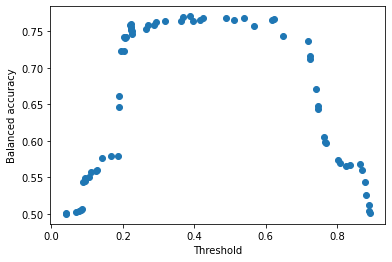

In [114]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [115]:
print("Threshold that maximizes accuracy: ", threshold[np.argmax(accuracy)])

Threshold that maximizes accuracy:  0.3884385634045566


This implies the threshold we are looking for.

In [116]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [117]:
X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=10
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)
THRESHOLD =  0.3355491555528277
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds)], index=["Accuracy"])


,0
Accuracy,0.928


Changing the default threshold by a threshold that maximizes accuracy has indeed maximized accuracy metric. In fact, the model does a very good job predicting whether passengers have survived or not, with 92.8% accuracy.

## Confusion Matrix
Just like accuracy, a confusion matrix is another way to evaluate Logistic Regression performance with more precision.

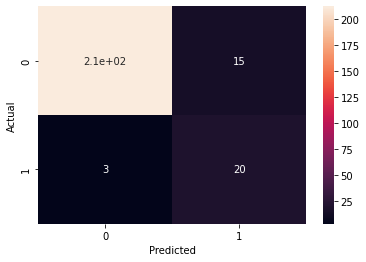

In [119]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Here, confusion matrix tells us that:

15 passengers who did not survive are wrongly predicted as survivors (False Positives)

3 passengers who survived are wrongly predicted as dead (False Negatives)

186 passengers who died also predicted as dead (True Positives)

20 passengers who survived are also predicted as survivors (True Negatives)

Accuracy:
How many correct predictions have we made from all the observations? Accuracy = (TP+TN)/(TP+FP+FN+TN)= 92.8%

Recall:
Out of all the passengers that died, how many did we get correct? Recall = TP/(TP+FN)= 98.4%

Precision:
Out of all the passengers that we predicted to be dead, how many did we actually get right? Precision= TP/(TP+FP)= 92.5%

Another Validation Matrix: ROC/AUC
AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC (Receiver Operating Characteristic) is a probability curve and AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between passengers who survived and those who did not.

The ROC curve summarizes all of the confusion matrices that each threshold produced and is plotted with True Positive Rate (TPR) which is the same thing as recall metric (or sensitivity) against the False Positive Rate (FPR) where TPR is on the y-axis and FPR is on the x-axis.

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score

ROC_AUC_score for Logistic Regression:  0.9017429611185597


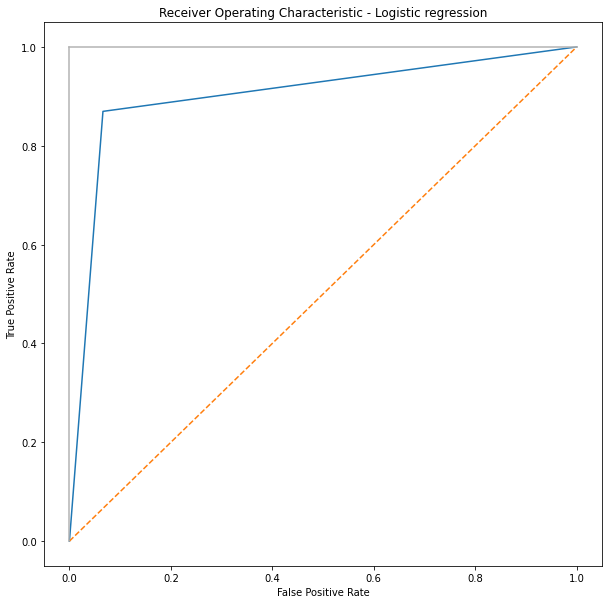

In [121]:
# Creating False and True Positive Rates and printing Score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, preds)
print('ROC_AUC_score for Logistic Regression: ', roc_auc_score(y_test, preds))
# Plot's size
plt.subplots(1, figsize=(10,10))
# Plot's title 
plt.title('Receiver Operating Characteristic - Logistic regression')
# Plot ROC Curve 
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# axis labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()


Our ROC-AUC_Score is equal to 0.9 which denotes a very good classifier able to predict passengers that are actually dead as dead and passengers that are actually alive as survivors.